<a href="https://colab.research.google.com/github/sam134-eng/INM706-Sequence-analysis/blob/main/Sentiment_Analysis(Test%201).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Upload the File
from google.colab import files
uploaded = files.upload()



Saving Tweets.csv to Tweets.csv


In [4]:
#load it with pandas
import pandas as pd

# Load the uploaded file (case-sensitive filename)
df = pd.read_csv("Tweets.csv")

# Preview the dataset
df.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [6]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [7]:
df.shape

(14640, 15)

In [8]:
# Keep only relevant columns
df = df[['text', 'airline_sentiment']]
df.head()


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_tfidf, y_train)
y_pred = clf.predict(X_test_tfidf)

print("TF-IDF + Logistic Regression Performance:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


TF-IDF + Logistic Regression Performance:
              precision    recall  f1-score   support

    Negative       0.80      0.94      0.86      1835
     Neutral       0.66      0.48      0.56       620
    Positive       0.81      0.55      0.66       473

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
from nltk.tokenize import word_tokenize
import pandas as pd
import nltk

nltk.download("punkt")

# Load and preprocess the dataset
df = pd.read_csv("Tweets.csv")
# Select only the 'text'  and 'airline_sentiment'  columns
df = df[['text', 'airline_sentiment']]
df = df[df['airline_sentiment'].isin(['positive', 'neutral', 'negative'])]
df["label"] = df["airline_sentiment"].map({"negative": 0, "neutral": 1, "positive": 2})

# Tokenize and build vocabulary
tokenized_texts = [word_tokenize(text.lower()) for text in df["text"]]
vocab = Counter(token for sent in tokenized_texts for token in sent)
vocab = {word: i + 2 for i, (word, _) in enumerate(vocab.items())}
vocab["<PAD>"] = 0
vocab["<UNK>"] = 1

def encode(tokens):
    return [vocab.get(t, vocab["<UNK>"]) for t in tokens]

encoded_texts = [torch.tensor(encode(tokens)) for tokens in tokenized_texts]
labels = torch.tensor(df["label"].values)

from torch.nn.utils.rnn import pad_sequence
padded_texts = pad_sequence(encoded_texts, batch_first=True, padding_value=vocab["<PAD>"])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(padded_texts, labels, test_size=0.2, stratify=labels, random_state=42)

class SentimentDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.labels[idx]

train_dataset = SentimentDataset(X_train, y_train)
test_dataset = SentimentDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# LSTM Model
class LSTMClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        _, (hidden, _) = self.lstm(x)
        out = self.fc(hidden[-1])
        return out

model = LSTMClassifier(len(vocab), 100, 128, 3)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
for epoch in range(10):
    model.train()
    total_loss = 0
    for texts, labels in train_loader:
        outputs = model(texts)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss/len(train_loader):.4f}")

# Evaluation
model.eval()
correct = total = 0
with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy on test data: {100 * correct / total:.2f}%")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1 Loss: 0.8344
Epoch 2 Loss: 0.6576
Epoch 3 Loss: 0.5766
Epoch 4 Loss: 0.5220
Epoch 5 Loss: 0.5245
Epoch 6 Loss: 0.4820
Epoch 7 Loss: 0.4257
Epoch 8 Loss: 0.3742
Epoch 9 Loss: 0.3157
Epoch 10 Loss: 0.2646
Accuracy on test data: 77.29%


In [18]:
from sklearn.metrics import classification_report

y_true = []
y_pred = []

with torch.no_grad():
    for texts, labels in test_loader:
        outputs = model(texts)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.tolist())
        y_pred.extend(predicted.tolist())

print(classification_report(y_true, y_pred, target_names=['Negative', 'Neutral', 'Positive']))


              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86      1835
     Neutral       0.59      0.57      0.58       620
    Positive       0.69      0.66      0.68       473

    accuracy                           0.77      2928
   macro avg       0.71      0.70      0.71      2928
weighted avg       0.77      0.77      0.77      2928



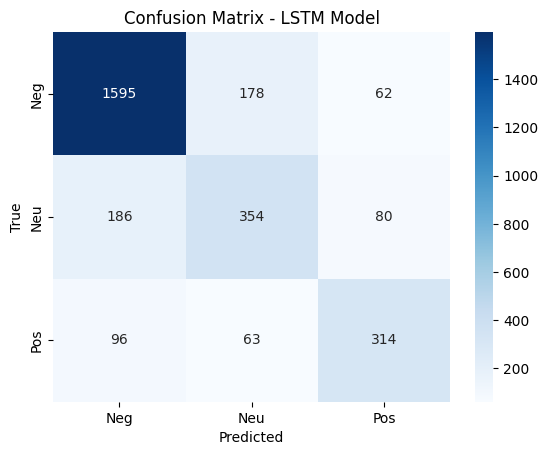

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Neg', 'Neu', 'Pos'], yticklabels=['Neg', 'Neu', 'Pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - LSTM Model")
plt.show()
